# ML - HW5 - Q6
# Ali Khoramfar - 810102129

# Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import euclidean
from itertools import combinations


# Part1 :

## Load MNIST

In [4]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target.astype(int)

### Filter Data

In [5]:
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

### Convert to Vector

In [6]:
X_array = X.to_numpy()
print("Shape of X_array:", X_array.shape)  # Should be (number_of_samples, 784)
print("First sample vector:\n", X_array[0])

Shape of X_array: (14780, 784)
First sample vector:
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

## PCA

In [7]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_array)

## Gaussian Mixture Model 

In [8]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_reduced)

GaussianMixture(n_components=2)

### Parameters of GMM

In [9]:
means = gmm.means_
covariances = gmm.covariances_

print("Means:\n", means)
print("Covariances:\n", covariances)

Means:
 [[1006.19031157   10.51864427]
 [-909.37840535   -9.50657926]]
Covariances:
 [[[238645.12579746 -13106.69055459]
  [-13106.69055459 155480.85587441]]

 [[ 15765.73998177  -6364.89252409]
  [ -6364.89252409 412967.18912251]]]


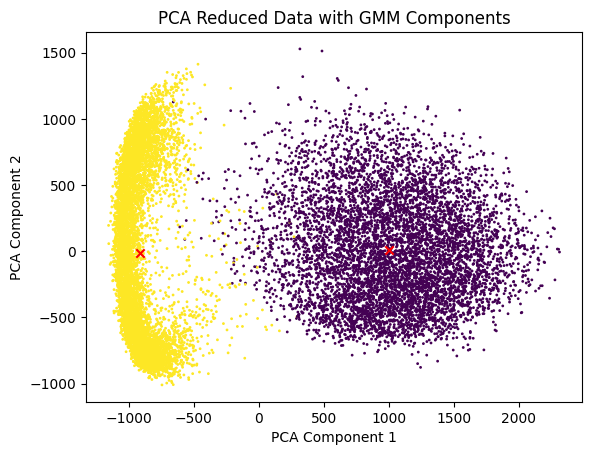

In [10]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=1, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x')
plt.title('PCA Reduced Data with GMM Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Part 2:

 ### Euclidean distance of means

In [11]:
distance = euclidean(means[0], means[1])
print("Euclidean distance between the means of the two Gaussian components:", distance)

Euclidean distance between the means of the two Gaussian components: 1915.6733852091775


# Part 3:

 ### Inverse PCA

In [12]:
means_original_space = pca.inverse_transform(means)

In [13]:
mean_image_1 = means_original_space[0].reshape(28, 28)
mean_image_2 = means_original_space[1].reshape(28, 28)

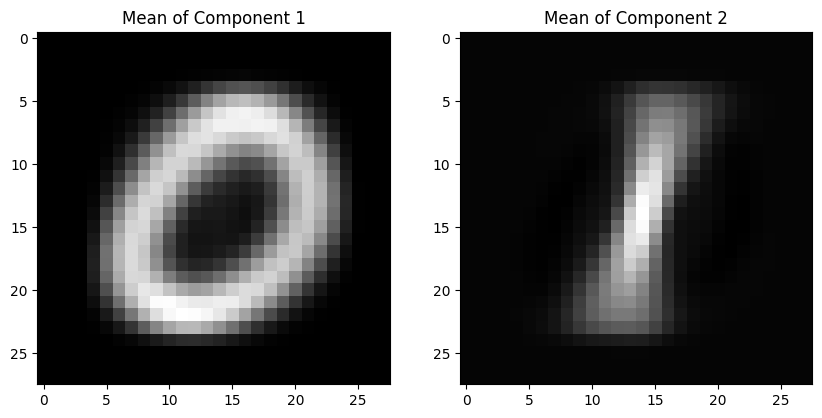

In [14]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mean_image_1, cmap='gray')
plt.title('Mean of Component 1')

plt.subplot(1, 2, 2)
plt.imshow(mean_image_2, cmap='gray')
plt.title('Mean of Component 2')

plt.show()

# Part 4:

In [15]:
probs = gmm.predict_proba(X_reduced)
prob_differences = np.abs(probs[:, 0] - probs[:, 1])

### Smallest probability differences

In [16]:
min_diff_indices = np.argsort(prob_differences)[:2]

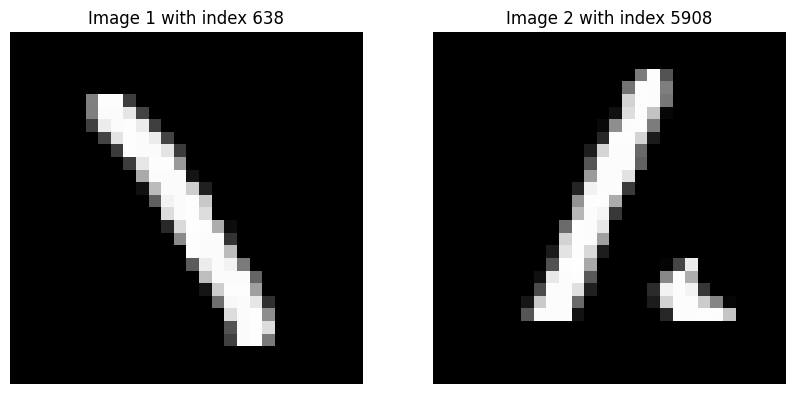

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, ax in enumerate(axes):
    index = min_diff_indices[i]
    ax.imshow(X_array[index].reshape(28, 28), cmap='gray')
    ax.set_title(f'Image {i+1} with index {index}')
    ax.axis('off')

plt.show()

In [17]:
selected_samples_reduced = X_reduced[min_diff_indices]

 ### Inverse PCA

In [18]:
selected_samples_original_space = pca.inverse_transform(selected_samples_reduced)

### Plot the images

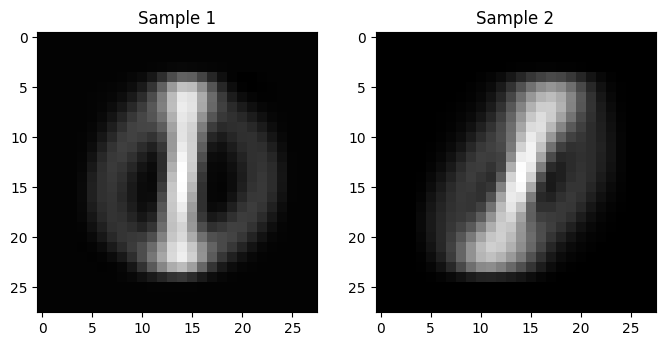

In [19]:
selected_images = [sample.reshape(28, 28) for sample in selected_samples_original_space]

plt.figure(figsize=(8, 8))

for i, img in enumerate(selected_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Sample {i + 1}')

plt.show()

# Part 5:

In [22]:
X = mnist.data
y = mnist.target.astype(int)

max_diff = -np.inf
min_diff = np.inf
max_pair = None
min_pair = None

## All possible pairs

In [23]:
for (class1, class2) in combinations(range(10), 2):
    mask = (y == class1) | (y == class2)
    X_pair = X[mask]
    y_pair = y[mask]
    
    X_pair_array = X_pair.to_numpy()
    
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X_pair_array)
    
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X_reduced)
    
    means = gmm.means_
    
    distance = euclidean(means[0], means[1])
    
    if distance > max_diff:
        max_diff = distance
        max_pair = (class1, class2)
    
    if distance < min_diff:
        min_diff = distance
        min_pair = (class1, class2)

In [24]:
print(f"The pair of classes with the maximum mean difference is {max_pair} with a distance of {max_diff:.2f}")
print(f"The pair of classes with the minimum mean difference is {min_pair} with a distance of {min_diff:.2f}")

The pair of classes with the maximum mean difference is (0, 1) with a distance of 1915.67
The pair of classes with the minimum mean difference is (8, 9) with a distance of 927.48
